## Prédiction de loyer améliorée

* __Objectif__ : améliorer le modèle de prédiction de loyer, à l'aide d'une feature (variable) supplémentaire en entrée, pour obtenir un modèle plus performant. L'arrondissement de l'appartement a été ajouté. 
* __Attendus__ :
    * séparation en training / testing set
    * 2 propositions d'amélioration du modèle qui obtiennent de meilleures performances que la "baseline" (la régression linéaire avec une seule feature)
    * sélection d'un modèle final à partir des performances
* __Rendu__ :
    * Fournir un fichier notebook avec l'ensemble des tests effectués ainsi que les outputs (images & graphes). 
    * Inclure des explications sur les points d'attentions dans les commentaires, ainsi que vos choix d'implémentation !

In [112]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Préparation des données

In [113]:
house_data = pd.read_csv('house_data.csv')

In [114]:
house_data.shape

(827, 3)

In [115]:
house_data.tail()

,price,surface,arrondissement
822,850,35.00,10.0
823,700,10.00,10.0
824,1280,34.00,10.0
825,1545,65.00,10.0
826,1000,21.43,10.0


In [116]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
price             827 non-null int64
surface           822 non-null float64
arrondissement    822 non-null float64
dtypes: float64(2), int64(1)
memory usage: 19.5 KB


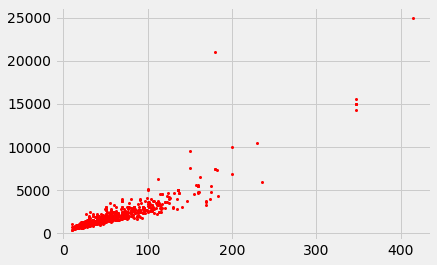

In [117]:
plt.style.use('fivethirtyeight')
plt.plot(house_data['surface'], house_data['price'], 'ro', markersize=2)

In [118]:
# on enlève les valeurs lignes avec un prix sans surface ou arrondissement
house_data = house_data.dropna(axis=0)

# on enlève les valeurs aberrantes
house_data = house_data[(house_data['price'] < 20000) & (house_data['surface'] < 300)]

## Séparation en training / testing set

In [119]:
from sklearn.model_selection import train_test_split

# Ici les données ou features sont les surfaces et les arrondissements
# et les cibles les loyers
X = house_data.drop('price',1)
y = house_data.price

# training set pour entraîner les modèles dans un 1er temps / puis testing set plus tard pour vérification
# répartition classique 80/20 entre training et testing set.
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### En suivant le diagramme pour choisir le bon modèle d'estimation ici : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html - Regression -> samples < 100k -> few features should be important -> on obtient 2 types de modèles qui pourraient convenir : Lasso & ElasticNet

#### Procédure:

source : https://makina-corpus.com/blog/metier/2017/initiation-au-machine-learning-avec-python-pratique

L'algorithme de prédiction est représenté par une classe.
* Commencer par choisir l'algorithme à utiliser appelé prédicteur/classifieur/estimator. Les algorithmes sont des classes Python. Les données sont toujours des tableaux Numpy/Scipy/Pandas/Python
* Préciser ses éventuels paramètres, appelés hyperparamètres en instanciant la classe
* Alimenter avec la fonction __fit__ dans le cas d'un apprentissage supervisé
* Lancer la prédiction sur un ensemble de valeurs via la fonction __predict__ parfois appelée transform dans le cas de l'apprentissage non supervisé
* Vérifier la pertinence du modèle

## 1er modèle LASSO 

In [120]:
from sklearn.linear_model import Lasso

# création de l'instance du modèle
regLasso = Lasso(fit_intercept=False,normalize=False)

# apprentissage
regLasso.fit(xtrain, ytrain)

Lasso(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
# les coefficients
print(regLasso.coef_)

[ 33.91981434 -16.99611271]


In [122]:
error = 1 - regLasso.score(xtest, ytest)
print('Erreur du modèle regression Lasso : {:.2f}'.format(error))

Erreur du modèle regression Lasso : 0.16


##### la précision n'est pas très bonne... peut être aurait il été nécessaire de supprimer plus de valeurs pour les grandes surfaces

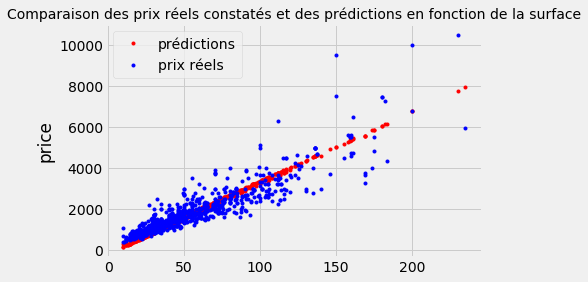

In [123]:
plt.title("Comparaison des prix réels constatés et des prédictions en fonction de la surface", fontsize='medium')
# Labels pour les axes
#plt.xlabel('surface')
plt.ylabel('price')
plt.plot(X.surface, regLasso.predict(X), '.', color='red', label='prédictions')
plt.plot(X.surface, y, '.', color='blue', label='prix réels')
# La légende est générée à partir de l'argument label de la fonction
plt.legend(loc='upper left');
plt.show()

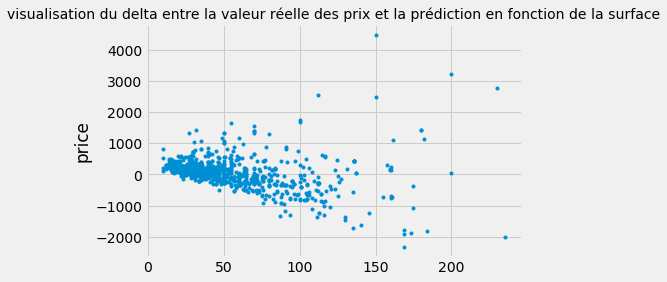

In [124]:
# visualisation du delta entre la valeur réelle des prix et la prédiction en fonction de la surface
plt.title("visualisation du delta entre la valeur réelle des prix et la prédiction en fonction de la surface", fontsize='medium')
plt.ylabel('price')
plt.plot(X.surface, y-regLasso.predict(X), '.')
plt.show()

##### On constate que l'erreur de prédiction est très proche de 0 et donc que le modèle est relativement juste pour des petites surfaces. Ceci est de moins en moins vraie lorsque la surface augemente. 

## 2ème modèle - ElasticNet

In [125]:
from sklearn.linear_model import ElasticNet

# création de l'instance du modèle
regElastic = ElasticNet(fit_intercept=False,normalize=False)

# apprentissage
regElastic.fit(xtrain, ytrain)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=False, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [126]:
# les coefficients
print(regElastic.coef_)

[ 33.88978322 -16.4856975 ]


In [127]:
error = 1 - regElastic.score(xtest, ytest)
print('Erreur du modèle regression ElasticNet : {:.2f}'.format(error))

Erreur du modèle regression ElasticNet : 0.16


##### On obtient le même taux d'erreur médiocre

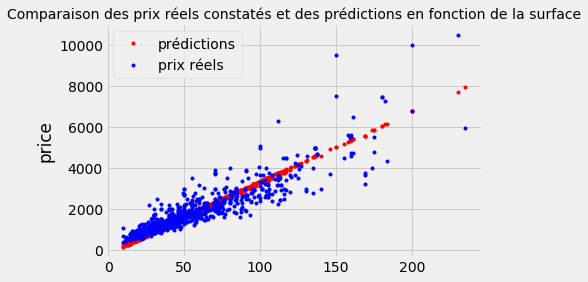

In [128]:
plt.title("Comparaison des prix réels constatés et des prédictions en fonction de la surface", fontsize='medium')
# Labels pour les axes
#plt.xlabel('surface')
plt.ylabel('price')
plt.plot(X.surface, regElastic.predict(X), '.', color='red', label='prédictions')
plt.plot(X.surface, y, '.', color='blue', label='prix réels')
# La légende est générée à partir de l'argument label de la fonction
plt.legend(loc='upper left');
plt.show()

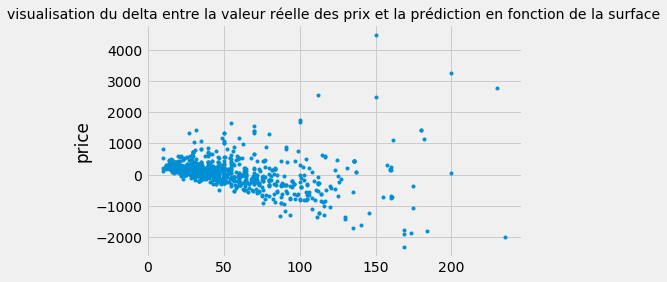

In [129]:
# visualisation du delta entre la valeur réelle des prix et la prédiction en fonction de la surface
plt.title("visualisation du delta entre la valeur réelle des prix et la prédiction en fonction de la surface", fontsize='medium')
plt.ylabel('price')
plt.plot(X.surface, y-regElastic.predict(X), '.')
plt.show()

In [130]:
# from sklearn.metrics import accuracy_score

# predictions = regElastic.predict(xtest)
# accuracy_score(predictions, ytest)